<a href="https://colab.research.google.com/github/sindhuvarun/stock-market-analysis/blob/main/01_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Stock Market Data Exploration
This notebook explores Apple stock data from `data/AAPL.csv`.
We'll load, clean, and visualize key trends.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-10-01,223.5,225.1,221.0,NaN,NaN,NaN


In [ ]:
# Check data info and summary
df.info()
df.describe()

NameError: name 'df' is not defined

In [ ]:
df = pd.read_csv('AAPL.csv')

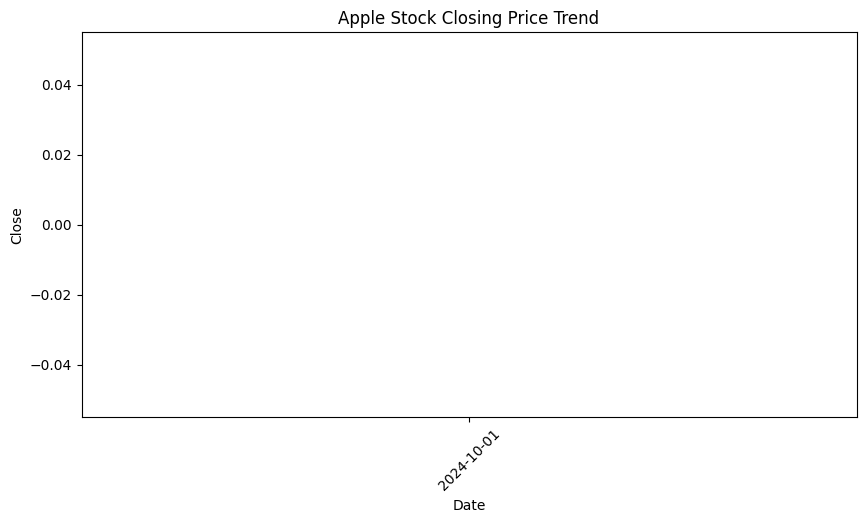

In [ ]:
# Plot Closing Prices
plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='Close', data=df)
plt.title('Apple Stock Closing Price Trend')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df = pd.read_csv('AAPL.csv')

In [ ]:
# Calculate daily returns
df['Daily Return'] = df['Close'].pct_change() * 100

# Show first 5 rows to check
df.head()


/tmp/ipython-input-3466637420.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Daily Return'] = df['Close'].pct_change() * 100


,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return
0,2024-10-01,223.5,225.1,221.0,NaN,NaN,NaN,NaN


In [ ]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df[['Date', 'Close', 'Daily Return']]


,Date,Close,Daily Return
0,2024-10-01,NaN,NaN


In [ ]:
import pandas as pd
import numpy as np

# Generate 30 days of sample stock data
dates = pd.date_range(start='2024-10-01', periods=30, freq='B')  # B = business days
open_prices = np.linspace(223, 230, 30) + np.random.randn(30)  # random small noise
high_prices = open_prices + np.random.rand(30) * 2
low_prices = open_prices - np.random.rand(30) * 2
close_prices = open_prices + np.random.randn(30)
adj_close = close_prices  # for simplicity
volume = np.random.randint(40000000, 55000000, size=30)

# Create DataFrame
df = pd.DataFrame({
    'Date': dates,
    'Open': open_prices,
    'High': high_prices,
    'Low': low_prices,
    'Close': close_prices,
    'Adj Close': adj_close,
    'Volume': volume
})

# Save as CSV inside Colab
df.to_csv('AAPLE.csv', index=False)

# Show first 5 rows
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-10-01,221.532438,221.718807,220.140408,223.194148,223.194148,50231880
1,2024-10-02,222.489825,224.220469,222.069035,221.334201,221.334201,46571983
2,2024-10-03,223.763996,225.643046,222.970891,222.987356,222.987356,52909949
3,2024-10-04,223.810616,225.149953,222.592497,222.365184,222.365184,53131922
4,2024-10-07,223.142115,224.658621,222.089828,224.925558,224.925558,42726340


In [ ]:
df = pd.read_csv('AAPLE.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-10-01,221.532438,221.718807,220.140408,223.194148,223.194148,50231880
1,2024-10-02,222.489825,224.220469,222.069035,221.334201,221.334201,46571983
2,2024-10-03,223.763996,225.643046,222.970891,222.987356,222.987356,52909949
3,2024-10-04,223.810616,225.149953,222.592497,222.365184,222.365184,53131922
4,2024-10-07,223.142115,224.658621,222.089828,224.925558,224.925558,42726340


MessageError: Error: credential propagation was unsuccessful

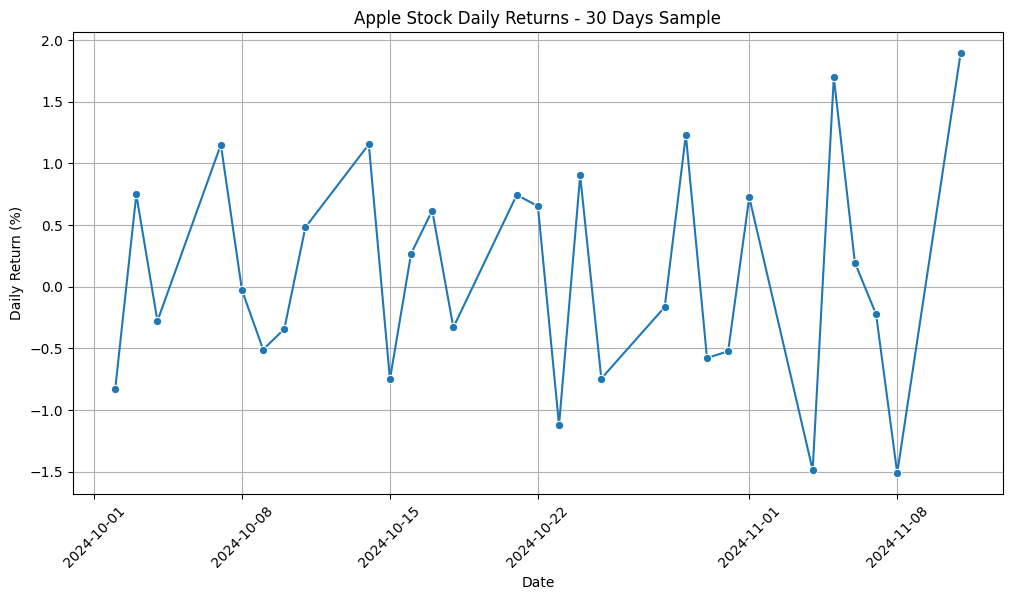

In [ ]:
# Calculate daily returns
df['Daily Return'] = df['Close'].pct_change() * 100

# Check first 5 rows
df[['Date', 'Close', 'Daily Return']].head()

# Plot daily returns
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Daily Return', data=df, marker='o')
plt.title('Apple Stock Daily Returns - 30 Days Sample')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
# Calculate 3-day moving average of the closing price
df['MA3'] = df['Close'].rolling(window=3).mean()

# Show first 10 rows to check
df[['Date', 'Close', 'MA3']].head(10)


,Date,Close,MA3
0,2024-10-01,223.194148,NaN
1,2024-10-02,221.334201,NaN
2,2024-10-03,222.987356,222.505235
3,2024-10-04,222.365184,222.228914
4,2024-10-07,224.925558,223.426032
5,2024-10-08,224.859595,224.050112
6,2024-10-09,223.711272,224.498808
7,2024-10-10,222.940055,223.836974
8,2024-10-11,224.011726,223.554351
9,2024-10-14,226.595926,224.515902


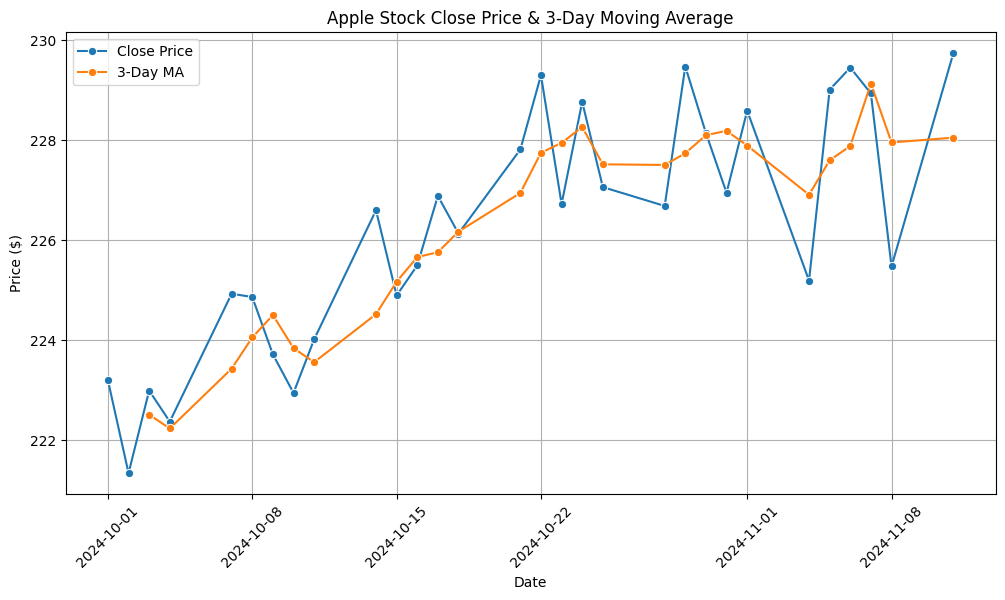

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Close', data=df, label='Close Price', marker='o')
sns.lineplot(x='Date', y='MA3', data=df, label='3-Day MA', marker='o')
plt.title('Apple Stock Close Price & 3-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()
